## Assignment 05 Web Scraping

In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [3]:
import pandas as pd

#### Using requests and BeautifulSoup to make a list of all CORGIS dataset

In [39]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [40]:
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    

    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>
    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"
            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="
            crossorigin="anonymous"></script>

    <scr

In [8]:
# Creating a list of all the datasets on Corgis
corgis_datalist = []
for i in document.find_all('h3'):
    corgis_datalist.append(i.text.strip())
    
corgis_datalist

['Aids',
 'Airlines',
 'Billionaires',
 'Broadway',
 'Business Dynamics',
 'Cancer',
 'Cars',
 'Classics',
 'Construction Permits',
 'Construction Spending',
 'County Demographics',
 'Covid',
 'Drugs',
 'Earthquakes',
 'Election',
 'Electricity',
 'Emissions',
 'Energy',
 'Finance',
 'Food',
 'Food Access',
 'Global Development',
 'Graduates',
 'Health',
 'Hospitals',
 'Hydropower',
 'Ingredients',
 'Injuries',
 'Labor',
 'Medal Of Honor',
 'Music',
 'Opioids',
 'Police Shootings',
 'Publishers',
 'Real Estate',
 'Retail Services',
 'School Scores',
 'Skyscrapers',
 'Slavery',
 'State Crime',
 'State Demographics',
 'State Fragility',
 'Suicide Attacks',
 'Supreme Court',
 'Tate',
 'Video Games',
 'Weather',
 'Wind Turbines']

#### Writing a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe

In [9]:
def pdcorgis(a):
    return a.lower()

In [10]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/drugs/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
for i in document.find_all('a'):
    if i.has_attr('download')==True:
        b = i['href']
        download_link = 'https://corgis-edu.github.io/corgis/csv/drugs/' + b
        drugsdf = pd.read_csv(download_link)

In [12]:
drugsdf

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Virginia,2018,629725,869285,5581639,10,82,267,0.015199,0.094035,...,518,0.096489,0.329603,0.092889,28,266,1234,0.045116,0.305545,0.221150
863,Washington,2018,545968,738052,5065742,11,75,282,0.020069,0.101770,...,1199,0.163818,0.454971,0.236665,20,163,1150,0.037481,0.220519,0.227040
864,West Virginia,2018,124659,174236,1235448,2,15,46,0.017428,0.087561,...,144,0.121996,0.330921,0.116328,10,70,438,0.081434,0.400053,0.354690
865,Wisconsin,2018,442510,615930,3861670,8,74,217,0.018720,0.120776,...,466,0.120078,0.326326,0.120566,17,157,917,0.038051,0.254571,0.237359


In [13]:
drugsdf.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699


In [14]:
## Obtaining data from just 5 states and the correlating 26+ year old Marijuana substance abusers count to plot
drugsdf.loc[0:5,['State','Totals.Marijuana.Used Past Year.26+']]

,State,Totals.Marijuana.Used Past Year.26+
0,Alabama,141
1,Alaska,46
2,Arizona,215
3,Arkansas,104
4,California,1670
5,Colorado,300


In [15]:
## Assigning new dataframe
drugsdf = drugsdf.loc[0:5,['State','Totals.Marijuana.Used Past Year.26+']]

<AxesSubplot:ylabel='State'>

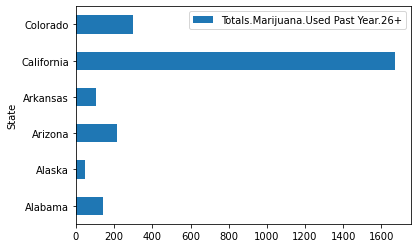

In [16]:
## Plotting new dataframe
drugsdf.plot(kind='barh',x='State',y='Totals.Marijuana.Used Past Year.26+')

##### 2nd CORGIS Dataset

In [17]:
def pdcorgis(a):
    return a.lower()

In [18]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/hospitals/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
for i in document.find_all('a'):
    if i.has_attr('download')==True:
        b = i['href']
        download_link = 'https://corgis-edu.github.io/corgis/csv/hospitals/' + b
        hospitalsdf = pd.read_csv(download_link)

In [19]:
hospitalsdf

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,Providence Hospital Of North Houston Llc,Houston,TX,Proprietary,-1,None,None,None,None,None,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4768,The Hospitals Of Providence Transmountain Campus,El Paso,TX,Proprietary,-1,None,None,None,Same,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4769,Saint Camillus Medical Center,Hurst,TX,Proprietary,-1,None,None,None,None,None,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
4770,Houston Methodist The Woodlands Hospital,The Woodlands,TX,Private,3,None,Same,None,Above,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


<AxesSubplot:xlabel='Facility.Name', ylabel='Rating.Overall'>

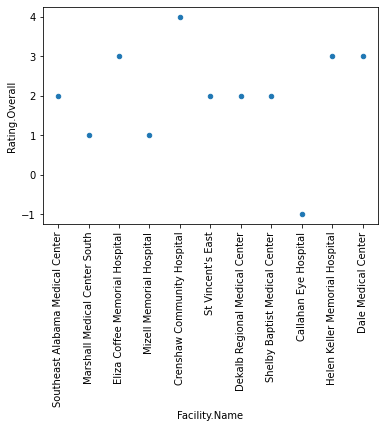

In [38]:
# Plotting first 11 rows of hospital dataframe 
hospitalsdf.loc[0:10,['Rating.Overall','Facility.Name']].plot(kind='scatter',x='Facility.Name',y='Rating.Overall',rot=90)

#### Third CORGIS dataset

In [4]:
def pdcorgis(a):
    return a.lower()

In [5]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/music/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
for i in document.find_all('a'):
    if i.has_attr('download')==True:
        b = i['href']
        download_link = 'https://corgis-edu.github.io/corgis/csv/music/' + b
        musicdf = pd.read_csv(download_link)

In [6]:
musicdf

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
0,0.581794,0.401998,ARD7TVE1187B99BFB1,0.00000,0,0.00000,Casual,0.0,hip hop,1.000000,...,0,0.636,218.932,0.779,0.28519,92.198,4.0,0.778,0,0
1,0.630630,0.417500,ARMJAGH1187FB546F3,35.14968,0,-90.04892,The Box Tops,0.0,blue-eyed soul,1.000000,...,0,0.430,137.915,0.969,0.20627,121.274,4.0,0.384,0,1969
2,0.487357,0.343428,ARKRRTF1187B9984DA,0.00000,0,0.00000,Sonora Santanera,0.0,salsa,1.000000,...,1,0.565,172.304,0.482,0.42132,100.070,1.0,0.000,0,0
3,0.630382,0.454231,AR7G5I41187FB4CE6C,0.00000,0,0.00000,Adam Ant,0.0,pop rock,0.988584,...,1,0.749,217.124,0.601,0.56254,119.293,4.0,0.000,0,1982
4,0.651046,0.401724,ARXR32B1187FB57099,0.00000,0,0.00000,Gob,0.0,pop punk,0.887288,...,1,0.371,198.699,1.000,0.13576,129.738,4.0,0.562,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.722571,0.499826,AR4C6V01187FB3BAF4,39.55792,0,-7.84481,Moonspell,0.0,sympho black metal,0.999765,...,1,0.540,386.194,0.224,0.22262,140.185,4.0,0.099,0,1998
9996,0.511663,0.409779,AR9JLBU1187B9AAEC4,-33.96243,0,25.62326,Danny Williams,0.0,ballad,0.915417,...,1,0.398,163.463,0.604,0.07692,77.072,3.0,0.597,0,1998
9997,0.433508,0.289903,ARS1DCR1187B9A4A56,0.00000,0,0.00000,Winston Reedy,0.0,lovers rock,0.960115,...,1,0.565,186.015,1.000,0.27924,118.123,4.0,0.205,0,0
9998,0.334457,0.216829,ARAGMIV11F4C843F78,0.00000,0,0.00000,"Myrick ""Freeze"" Guillory",0.0,zydeco,1.000000,...,1,0.503,300.826,0.421,0.28192,137.663,4.0,0.000,0,0


In [7]:
# sorting rows to get the top rated artist on top
musicdf=musicdf.sort_values(by=['artist.hotttnesss'], ascending=False,)

In [8]:
musicdf

,artist.familiarity,artist.hotttnesss,artist.id,artist.latitude,artist.location,artist.longitude,artist.name,artist.similar,artist.terms,artist.terms_freq,...,song.mode,song.mode_confidence,song.start_of_fade_out,song.tatums_confidence,song.tatums_start,song.tempo,song.time_signature,song.time_signature_confidence,song.title,song.year
8464,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000,...,0,0.485,31.373,0.723,0.13689,60.276,1.0,0.000,0,2005
4989,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Lupe Fiasco,0.0,hip hop,1.000000,...,1,0.072,236.721,0.894,0.29760,106.825,4.0,1.000,0,2010
2376,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West / Adam Levine,0.0,hip hop,1.000000,...,1,0.000,196.499,1.000,0.50407,95.098,4.0,1.000,0,2005
7331,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000,...,1,0.243,44.478,0.662,0.36261,201.792,5.0,0.255,0,2003
7275,0.877214,1.082503,ARRH63Y1187FB47783,0.0,0,0.0,Kanye West,0.0,hip hop,1.000000,...,1,0.497,31.320,0.745,0.08143,60.046,1.0,0.000,0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0.460251,0.000000,AR6896B1187B98FADA,0.0,0,0.0,Paso Doble,0.0,europop,1.000000,...,0,0.503,238.504,0.324,0.02719,156.260,4.0,0.000,0,0
3930,0.373330,0.000000,ARTR6RX1187FB381C8,0.0,0,0.0,Frederic Galliano,0.0,future jazz,0.982226,...,0,0.407,1375.184,0.160,0.12556,81.983,4.0,0.772,0,1997
2543,0.288351,0.000000,AREVNGE11F50C49B9A,0.0,0,0.0,Tom Collier,0.0,marimba,0.998469,...,0,0.509,389.074,0.914,0.06517,111.743,4.0,1.000,0,0
8951,0.452923,0.000000,ARLVEYZ1269FCCFC01,0.0,0,0.0,Rustless,0.0,emo,0.963339,...,0,0.139,115.136,0.211,0.08990,122.089,4.0,0.297,0,0


In [18]:
# making music dataframe contain only the top 20 artist
musicdf=musicdf.head(20)

<AxesSubplot:xlabel='artist.name'>

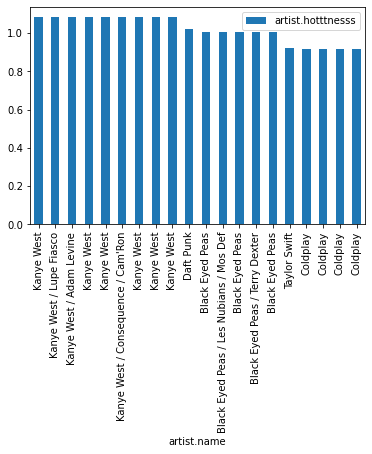

In [38]:
# plotting the top 20 artist in the datasheet
musicdf.plot(kind='bar',x='artist.name',y='artist.hotttnesss')